# Introduction to Data Science - Lecture 10 - Visualization
*COMP 5369 / MATH 4100, University of Utah, http://datasciencecourse.net/*

To be frank: the Python data visualization environment is a MESS. It remindes me of this: 


![](standards.png)

### Matplotlib & Extensions

 * [Matplotlib](https://matplotlib.org/) - the elephant in the room
 * [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html) - based on Matplotlib
 * [Seaborn](https://seaborn.pydata.org/) - based on Matplotlib, higher-level
 * [ggplot](http://ggplot.yhathq.com/) - based on the popular R plotting library, some similarites, uses Matplotlib.
 
These tools generally can be used to create figures independent of Jupyter. 
 
### Web-based Vis tools

 * [Bokeh](https://bokeh.pydata.org/en/latest/)
 * [Plotly](https://plot.ly/python/)
 * [Altair](https://github.com/altair-viz/altair), based on [Vega](https://vega.github.io/vega/) 
 * [PdVega](https://jakevdp.github.io/pdvega/), based on Vega, integrated with pandas dataframes.
 
 
These tools mostly rely on Jupyter running in your browser and use a JavaScript based language in the backend. 

As of February 2019, it seems like Plotly is a serios contender and Altair is gaining traction in the interactive space.  

There are also some domain specific libraries, e.g., for maps and for networks, that we will cover at a later point. 
 
 
There are also [many](https://www.dataquest.io/blog/python-data-visualization-libraries/) [blog](https://codeburst.io/overview-of-python-data-visualization-tools-e32e1f716d10) [posts](https://lisacharlotterost.github.io/2016/05/17/one-chart-code/) [comparing](https://blog.modeanalytics.com/python-data-visualization-libraries/) various data visualization libraries.

Generally speaking, there are 
 * **plotting libraries** that have pre-made charts, and 
 * **drawing libraries** that allow you to freely express anything you can imagine. 
 
We will mainly cover the former, but as visualization reseaerchers we typically rely on tools that enable as much expressivity as possible, such as [D3](https://d3js.org/) or [WebGL](https://developer.mozilla.org/en-US/docs/Web/API/WebGL_API).

We will start of with basic Matplotlib, explore the build-in pandas library, and then look at some more advanced tools.

## Matplotlib

Matplotlib is a project started in 2002 and is inspired by MATLAB plotting. 

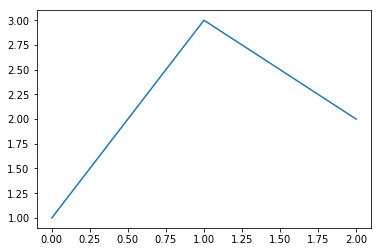

In [1]:
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt

# remember, code after a % is ipython specific instructions
# this command tells Jupyter/ipython that we want to create the visualizations
# inline in this notebook instead of as files to save.
%matplotlib inline

# here we run a simple plot command to create a line chart
plt.plot([1, 3, 2])

The `.plot` command uses a [`figure`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) to plot in. If no figure has been defined, it will automatically create one. If there is already a figure, it will plot to the latest figure. 

Here we create a figure manually: 

In [2]:
%matplotlib inline

# we create a figure with size 10 by 10 inches
fig = plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

The figure by itself doesn't plot anyhing. We have to add a [`subplot`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot) to it. 

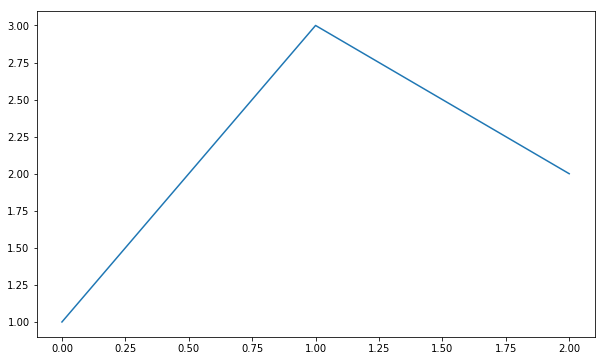

In [3]:
%matplotlib inline
# figsize defines the size of the plot in inches - 10 wide by 6 high here. 
fig = plt.figure(figsize=(10, 6))
# add a suplot to an grid 1x1, return the 1st figure
my_plot = fig.add_subplot(1,1,1)
# plotting a data array
my_plot.plot([1,3,2])

Here we add a title and axis labels: 

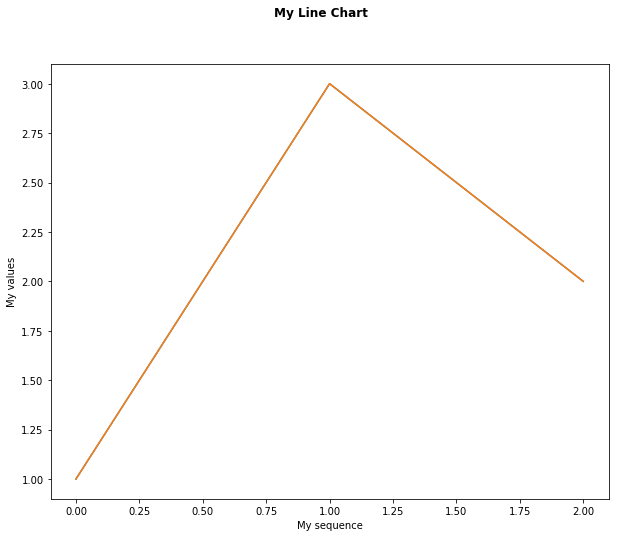

In [4]:
fig = plt.figure(figsize=(10, 8))
my_plot = fig.add_subplot(1,1,1)
my_plot.plot([1,3,2])
fig.suptitle('My Line Chart', fontsize=12, fontweight='bold')
my_plot.set_xlabel("My sequence")
my_plot.set_ylabel("My values")
my_plot.plot([1,3,2])

Now let's create a figure with multiple subplots:

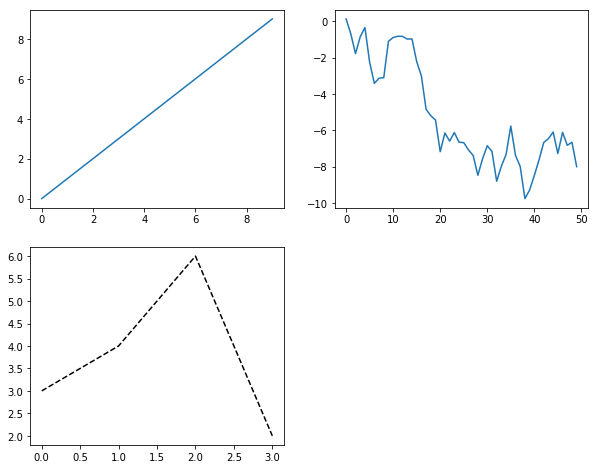

In [5]:
fig = plt.figure(figsize=(10, 8))
# create a subplot in a 2 by 2 grid, 
# return the subplot at position specified in third parameter
# these subplots are often called "axes"
sub_fig_1 = fig.add_subplot(2,2,1)
sub_fig_2 = fig.add_subplot(2,2,2)
sub_fig_3 = fig.add_subplot(2,2,3)

# this will plot to the last figure used, k-- is a style option for black dashed
# you shouldn't do that but rather use explicit subplot references if you have them
plt.plot([3, 4, 6, 2], "k--")

# here is how we can plot explicitly to a subfigure
sub_fig_1.plot(range(0,10))

sub_fig_2.plot(np.random.randn(50).cumsum())

We can use the [`subplots`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=subplots#matplotlib.figure.Figure.subplots) shorthand to create multiple subplots that we can access form an array. 

We're also trying out a couple of different visualziation techniques: 

 * [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)  
 * [Vertical Bar Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)
 * [Horizontal Bar Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh)
 * [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot)
 * [Histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)
 * [Pie Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)

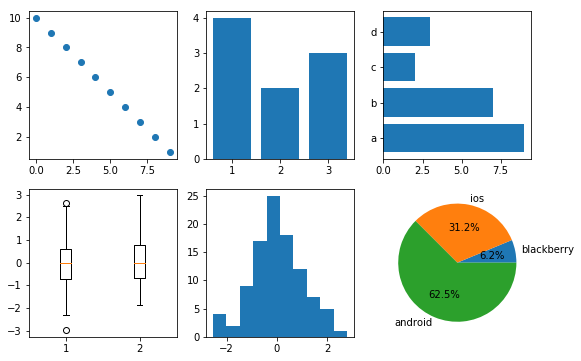

In [6]:
# a function because we'll reuse these later
def sample_figures():
    # define a figure with subfigures in 2 rows and 3 columns
    fig, subfigs = plt.subplots(2, 3, figsize=(9, 6))

    # Scatterplot. Pass two arrays for your x and y values.
    subfigs[0,0].scatter(range(0,10),range(10,0,-1))
    
    # Bar Chart. First array is x position, second is value (height) of data
    subfigs[0,1].bar([1, 2, 3], [4, 2, 3])
    
    # Horizontal Bar Chart. 
    # First array contains y positions (expressed as range), second contains data values (lengths of bars), 
    # tick_label is an array of labels
    subfigs[0,2].barh(range(0,4), [9, 7, 2, 3], tick_label=["a", "b", "c", "d"])
    
    # Box Plots visualizing two distributions with 100 items each. 
    subfigs[1,0].boxplot([np.random.randn(100), np.random.randn(100)])
    
    # A Histogram visualizes a distribution. It takes one array, we can specify bins as second parameter 'bins'
    subfigs[1,1].hist(np.random.randn(100))
    
    # You can also (but maybe you shouldn't) do pie charts. First array is shares of total. 
    # labels in the same order of data. autopct defines how to format the numerical labels 
    # (here, one digit after comma)
    subfigs[1,2].pie([1, 5, 10], labels=["blackberry", "ios", "android"], autopct='%1.1f%%')

sample_figures()

### Heat Maps

Heat maps encoded matrix/tabular data using color. There are two ways to implement heatmaps in Matplotlib:

 * [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html)
 * [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

imshow is used to display images (which are just matrices). In practice, imshow and pcolor differ mainly in their coordinate system: the origin of imshow is at the top left (as is common for images), the origin of pcolor is at the bottom left.

For heatmaps, we need a [color map](https://matplotlib.org/tutorials/colors/colormaps.html). Matplotlib has many color maps baked in, also those from http://colorbrewer.org.

In [7]:
# just a helper function to create some 2D data based on a gaussian kernel.
def gkern(l=5, sig=1.):
    """
    creates gaussian kernel with side length l and a sigma of sig
    """
    ax = np.arange(-l // 2 + 1., l // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sig**2))
    return kernel / np.sum(kernel)

kernel = gkern(20, 5)

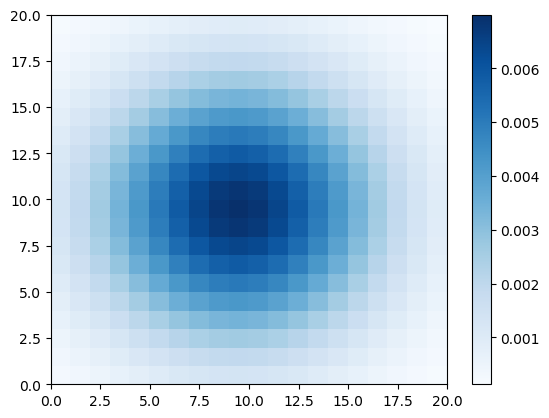

In [8]:
plt.style.use('default')
# select a blue color map
heatmap = plt.pcolor(kernel, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

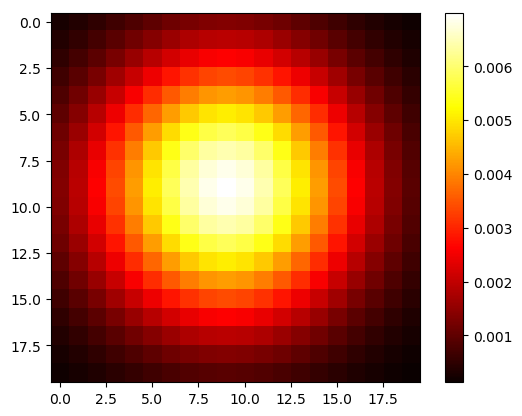

In [9]:
hm = plt.imshow(kernel, cmap='hot')
plt.colorbar(hm)

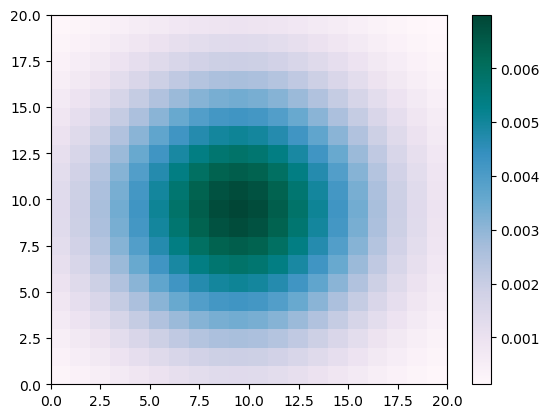

In [10]:
# a diverging color map from Color Brewer
heatmap = plt.pcolor(kernel, cmap=plt.cm.PuBuGn)
plt.colorbar(heatmap)

### Styling

Matplotlib has [different styles](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html) that we can apply globally.

Here are a couple of examples:

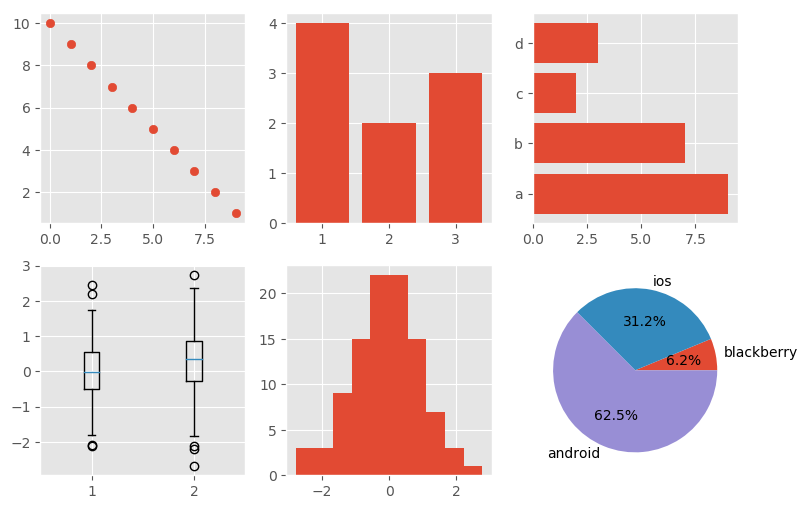

In [11]:
# ggplot style based on the popular R plotting library 
# we will be using this as a default in many lectures
plt.style.use('ggplot')
sample_figures()

In [12]:
# style based on the seaborn library
#plt.style.use('seaborn')
#sample_figures()

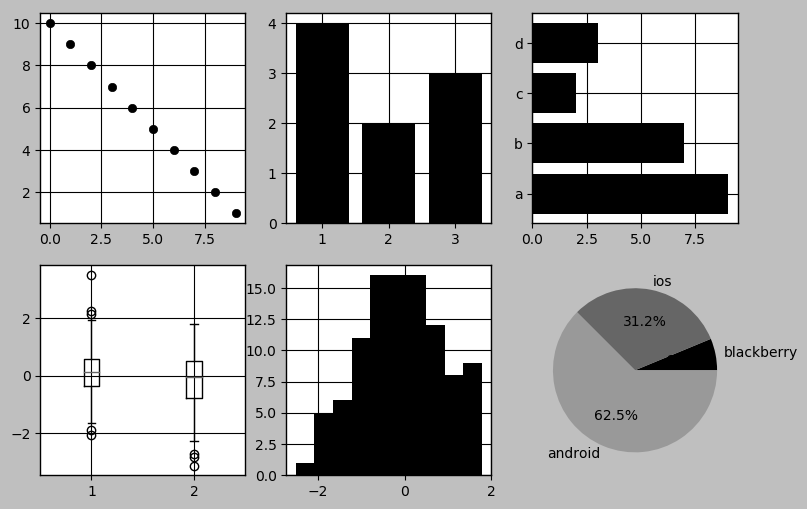

In [13]:
plt.style.use('grayscale')
sample_figures()

## Plotting with Pandas

Pandas has good [built-in plotting capabilities](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html). We've seen some already in previous lectures and in the homeworks.

We're going to use the movies dataset to demonstrate plots and start of by reproducing some of the work you did for your homework: 

In [14]:
plt.style.use('ggplot')
pd_movies = pd.read_csv('movies.csv')
pd_movies.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


### Line Chart

In [15]:
# subset to major movies
major_movies = pd_movies[pd_movies['votes'] >= 500]
# show yearly number of moves
yearly_movies = major_movies["year"].value_counts().sort_index()

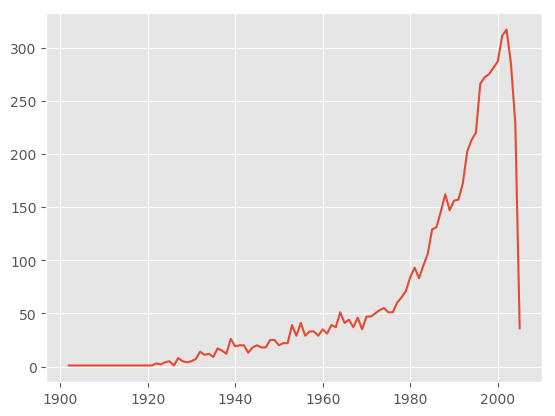

In [16]:
yearly_movies.plot()

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1185a3da0>]],
      dtype=object)

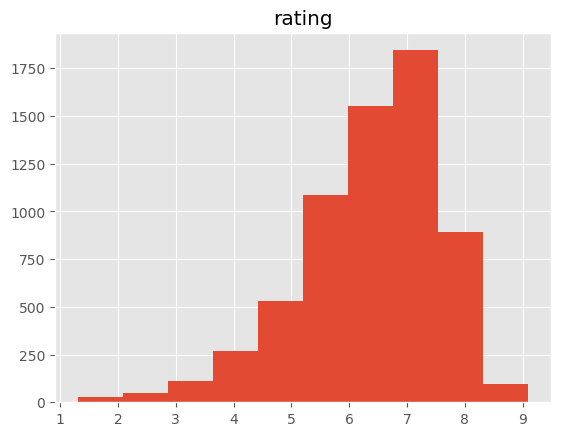

In [17]:
major_movies.hist("rating")

### Bar Chart

We'll show a bar chart for the first 10 movies

In [18]:
subset = major_movies.set_index("title")
subset = subset.iloc[0:10]
subset

,Unnamed: 0,year,length,budget,rating,votes,r1,r2,r3,r4,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
title,,,,,,,,,,,,,,,,,,,,,
'A' gai waak,15,1983,106,NaN,7.1,1259,4.5,4.5,4.5,4.5,...,14.5,24.5,PG-13,1,0,1,0,0,0,0
'A' gai waak juk jaap,16,1987,101,NaN,7.2,614,4.5,4.5,4.5,4.5,...,14.5,14.5,PG-13,1,0,1,0,0,0,0
'Breaker' Morant,17,1980,107,NaN,7.9,2718,4.5,4.5,4.5,4.5,...,24.5,24.5,NaN,0,0,0,1,0,0,0
'Crocodile' Dundee II,19,1988,110,NaN,5.0,7252,4.5,4.5,4.5,14.5,...,4.5,4.5,NaN,1,0,1,0,0,0,0
'I Know Where I'm Going!',29,1945,92,NaN,7.7,825,4.5,4.5,4.5,4.5,...,14.5,34.5,NaN,0,0,0,1,0,1,0
'Manos' the Hands of Fate,35,1966,74,19000.0,1.6,7996,74.5,4.5,4.5,4.5,...,4.5,14.5,NaN,0,0,0,0,0,0,0
'Round Midnight,44,1986,133,NaN,7.3,902,4.5,4.5,4.5,4.5,...,14.5,24.5,NaN,0,0,0,1,0,0,0
'Til There Was You,48,1997,113,23000000.0,4.8,799,4.5,4.5,4.5,14.5,...,4.5,14.5,PG-13,0,0,1,0,0,1,0
"'burbs, The",51,1989,101,NaN,6.0,7641,4.5,4.5,4.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0


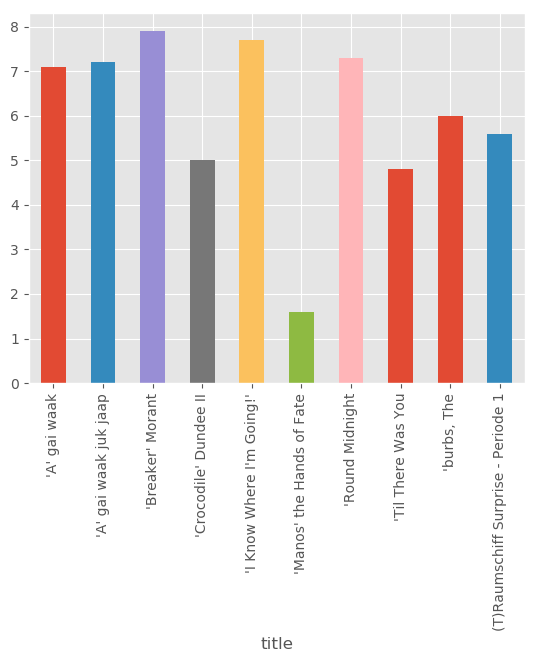

In [19]:
subset["rating"].plot(kind="bar")

We can create grouped bar charts. The values should be on the same axis.

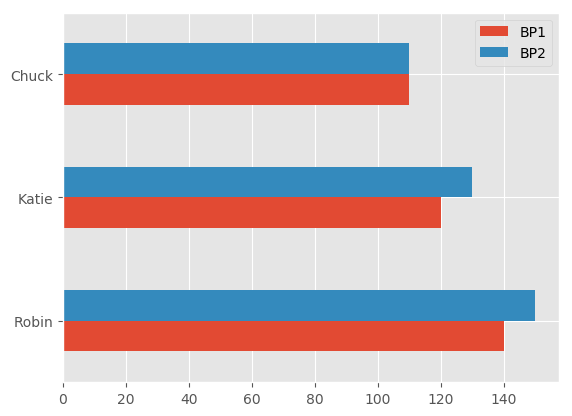

In [20]:
pulse = pd.DataFrame({
        "BP1":[140, 120, 110],
        "BP2":[150, 130, 110]
    })
pulse.index = ["Robin", "Katie", "Chuck"]

pulse.plot(kind="barh")

Equally, we can create stacked bar charts: 

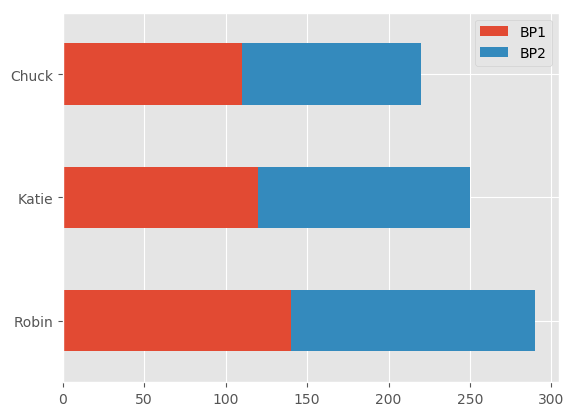

In [21]:
pulse.plot(kind="barh", stacked="True")

### Scatterplot

We can plot a scatterplot, comparing ratings of movies over time:

<Figure size 1000x1000 with 0 Axes>

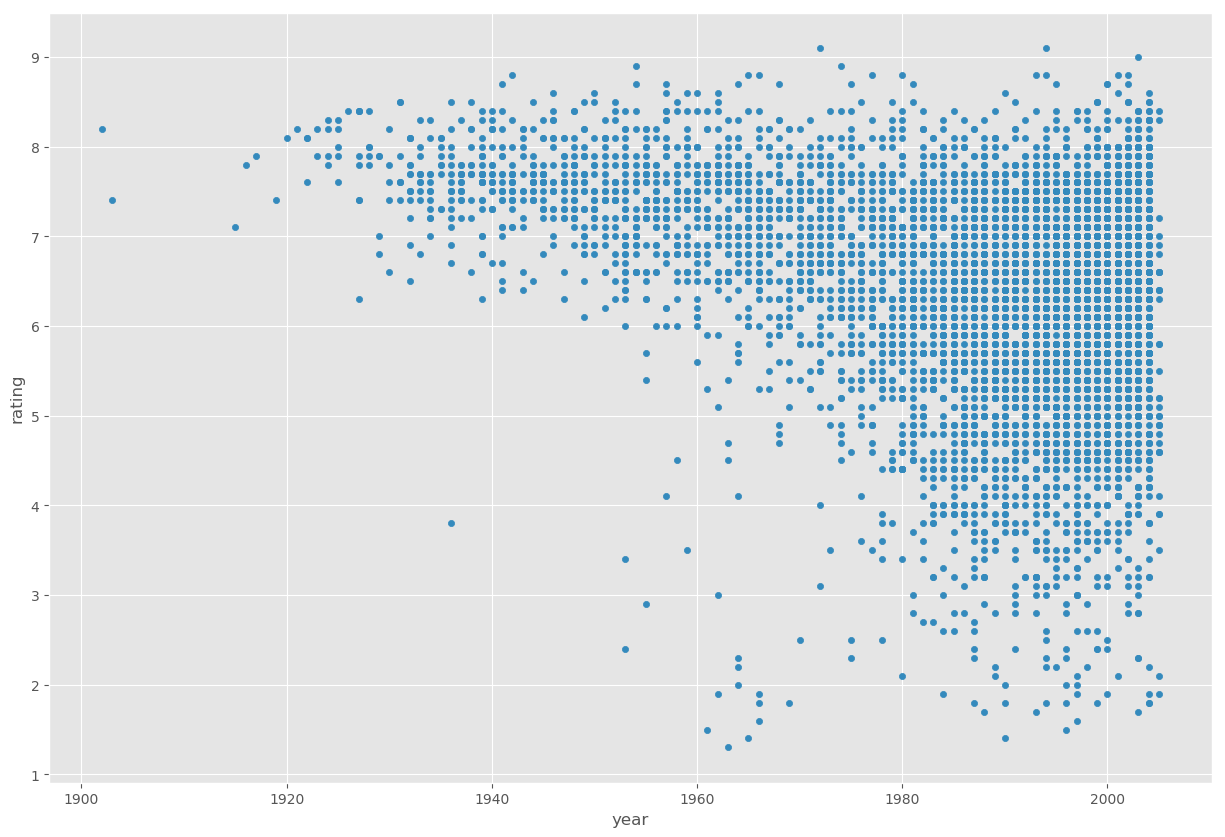

In [22]:
plt.figure(figsize=(10, 10))
major_movies.plot.scatter("year", "rating", figsize=(15, 10))

However, here we might overplot some points in more recent years. We can fix that with an alpha value:

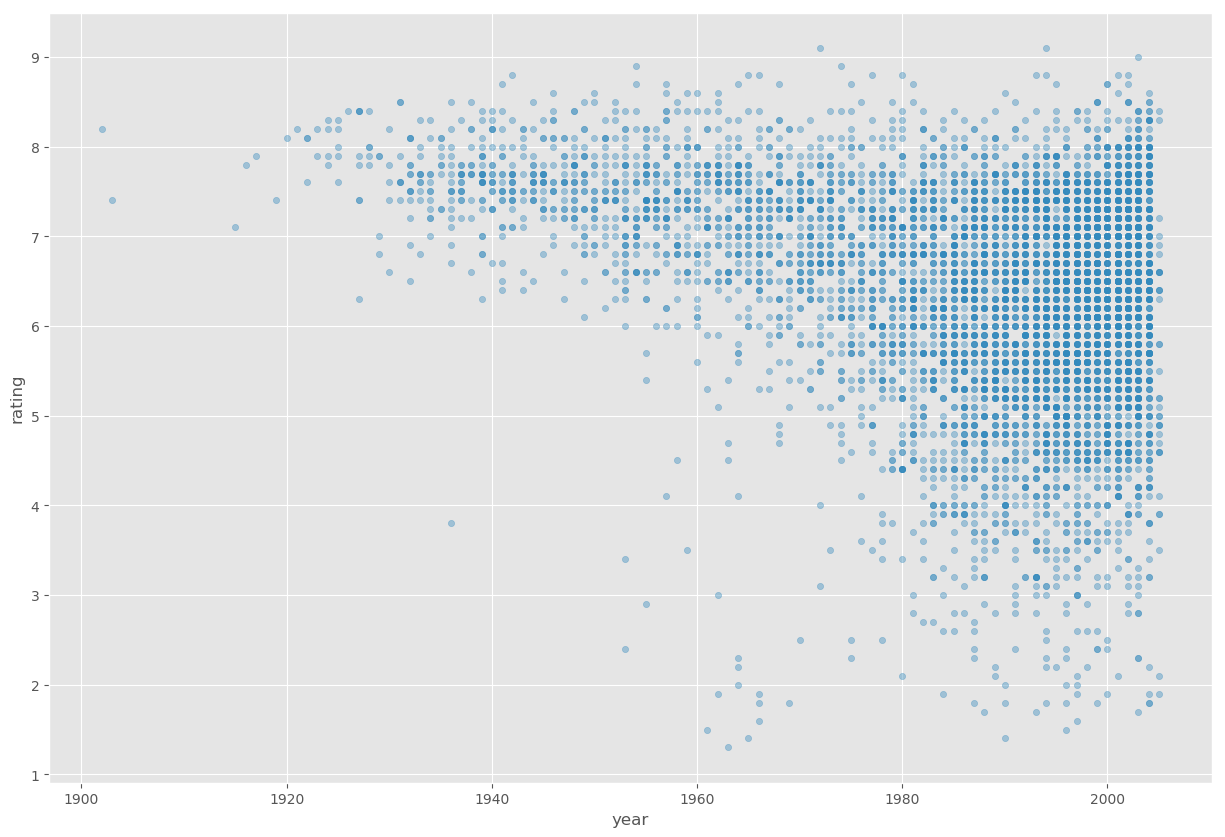

In [23]:
major_movies.plot.scatter("year", "rating", figsize=(15, 10), alpha=0.4)

### Box Plot

Let's plot a box plot of the ratings

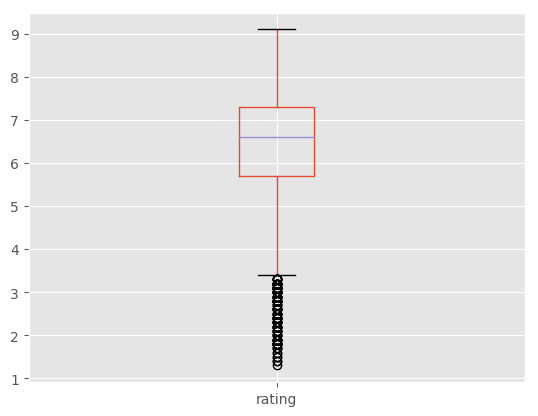

In [24]:
plt.style.use('ggplot')
major_movies[["rating"]].plot(kind="box")

We can also create boxplots for the data grouped by another column. Here, we create a rating box plot for each year: 

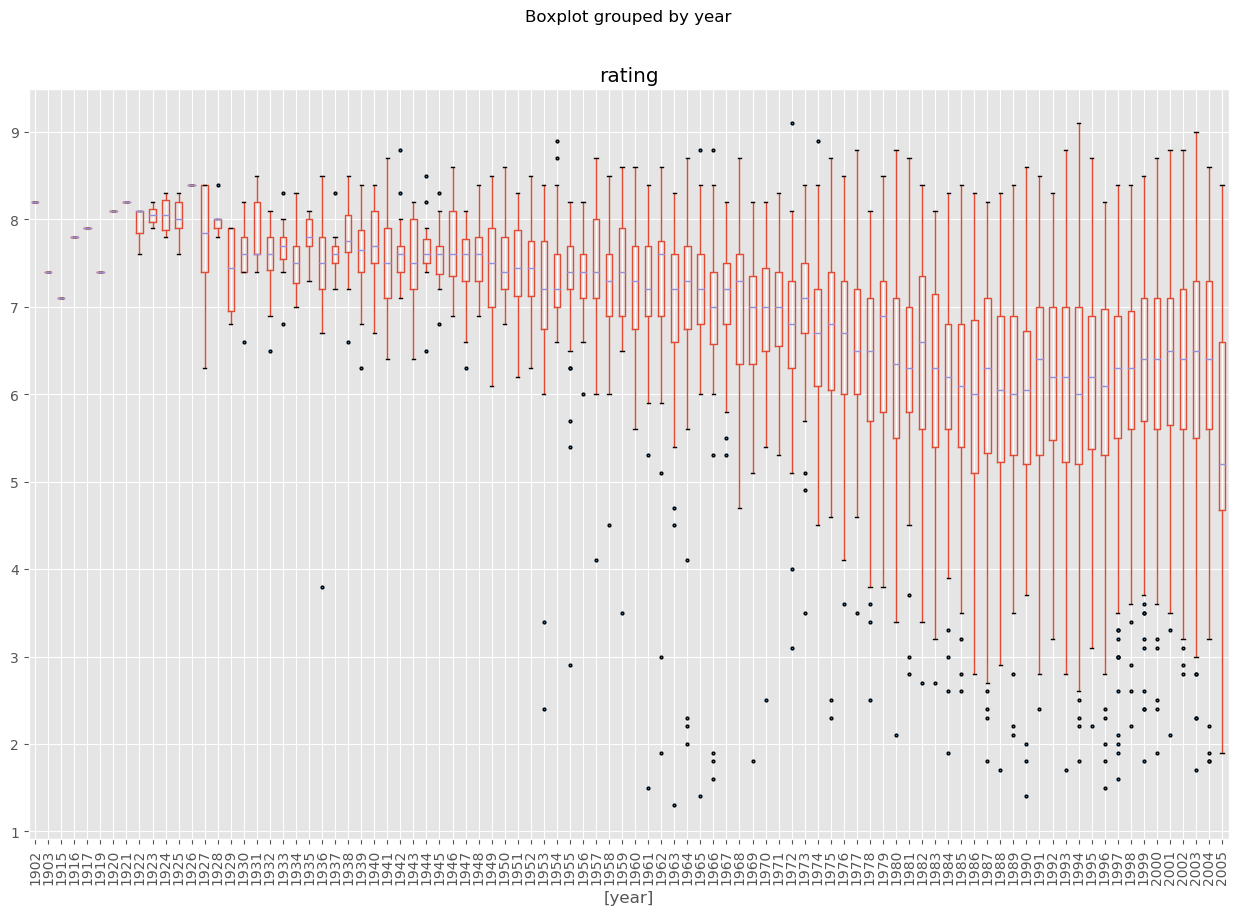

In [25]:
flierprops = dict(marker='o', markerfacecolor='steelblue', markersize=2,
                  linestyle='none')
major_movies.boxplot(column=["rating"], by=["year"], rot=90, figsize=(15,10), flierprops=flierprops)

## Scatterplot Matrix 

We frequently will look at high-dimensional datasets. We can do that conveniently with a scatterplot matrix:

In [26]:
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ad4acf8>,
      dtype=object)

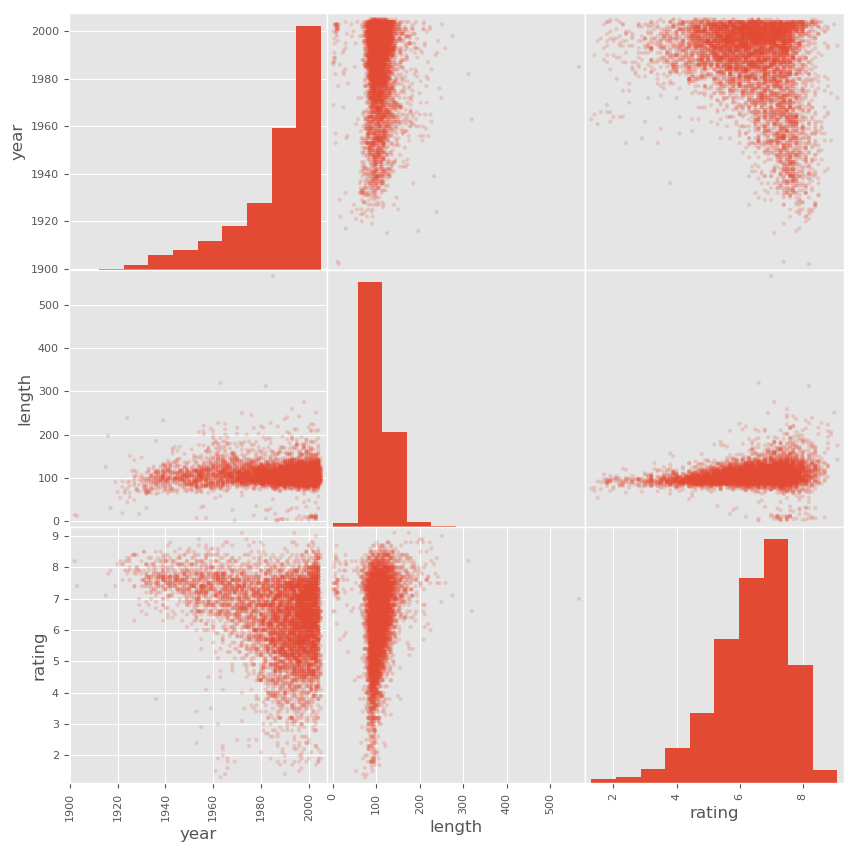

In [27]:
scatter_matrix(major_movies[["year", "length", "rating"]], alpha = 0.2, figsize=(10, 10))

Here the cells with the same variables in columns and rows are shown as histograms. We can also use KDEs instead: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b4bc7f0>,
      dtype=object)

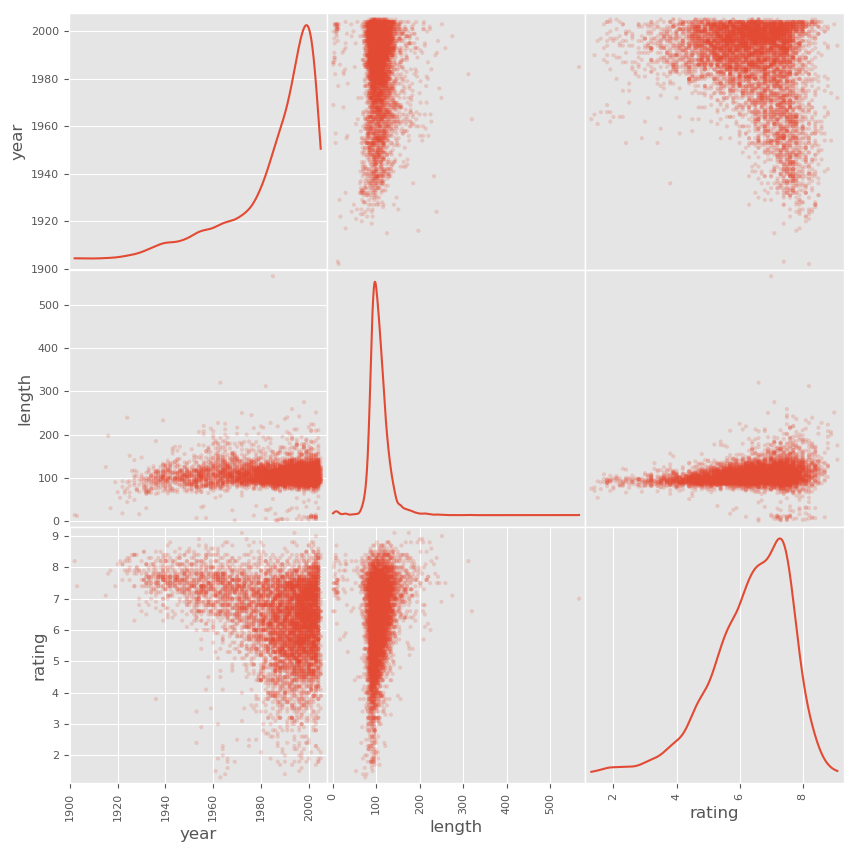

In [28]:
scatter_matrix(major_movies[["year", "length", "rating"]], diagonal="kde", alpha = 0.2, figsize=(10, 10))